# Wisdom of the Tribe -- Descriptive Statistics
### Justin M. Olds [github.com/jmolds](https://github.com/jmolds)

**Project objectives:** 
* Identify film critics whose preferences align with a given person. 
* Provide film recommendations based on a person's "tribe" of likeminded critics.

**Data:**
* 165,332 critic reviews taken from [metacritic.com](https://www.metacritic.com)
* corresponding to 7689 films
* Reviews were scraped from [metacritic.com](https://www.metacritic.com) based on a list of 190,00 films obtained by scraping search results from [imdb.com](https://www.imdb.com) for the top 500 grossing films (in the US) for every year from 1980 to 2018. 

**Inital exploratory questions:**
* What is the average number of reviews per film, what does the distirbution of total reviews for each films look like?
* What is the average rating for films and what does distibutions of review averages look like?
* What is the average standard deviation of ratings for films, what does this distibution look like, and which films have the hightest amount of variance (largest standard deviation values)? 

In [25]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import savgol_filter

pd.set_option('precision', 2)
np.set_printoptions(precision=2)

conn = sqlite3.connect("C:/Users/Justin/films_and_reviews2.db")
c = conn.cursor()

In [31]:
film_averages = pd.read_sql_query("""
    SELECT film_title, AVG(rating) AS RatingAVG, COUNT(*) as count, film_release_date, film_runtime, film_id
    FROM film INNER JOIN review USING(film_id)
    GROUP BY film_id
""", conn)
reviews = pd.read_sql_query("""
    SELECT *
    FROM review 
""", conn)
print(str(len(reviews)) + " critic reviews from " + str(len(film_averages)) + " films from 1980 to 2018.")

165332 critic reviews from 7689 films from 1980 to 2018.


In [46]:
import plotly.plotly as py
import plotly.tools as tls

import matplotlib.pyplot as plt
import numpy as np
plt.hist(film_averages['RatingAVG'], bins=40)
fig = plt.gcf()
plotly_fig = tls.mpl_to_plotly( fig )
py.iplot(plotly_fig, filename='mpl-basic-histogram')

C:\Users\Justin\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead




Averages:
RatingAVG    58.08
dtype: float64



Mean of mean film ratings:
RatingAVG    58.08
dtype: float64

Standard Deviation of mean film ratings:
RatingAVG    15.61
dtype: float64


C:\Users\Justin\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



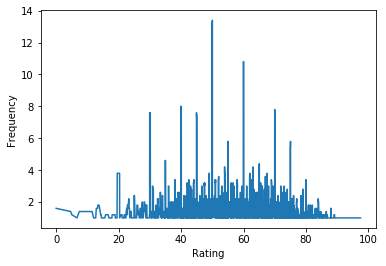

In [47]:
print('\nMean of mean film ratings:')
print(np.mean(film_averages[['RatingAVG']]))

print('\nStandard Deviation of mean film ratings:')
print(np.std(film_averages[['RatingAVG']]))

g = film_averages.groupby('RatingAVG')
info = g['RatingAVG'].agg(['sum','count']).reset_index()

plt.plot(info['RatingAVG'], savgol_filter(info['count'], 5, 1), label = 'Mean film rating') 
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [24]:
hist_data = [df.RatingAVG]; group_labels = ['distplot']
fig = ff.create_distplot(hist_data, group_labels, bin_size=.5)
py.iplot(fig, filename='Basic Distplot')